<a href="https://colab.research.google.com/github/pritam-dante/machineLearning/blob/main/Project/minor/final/minorProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install plotly

In [2]:

import plotly.express as px


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.sample(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
222,48,F,NAP,120,195,0,Normal,125,N,0.0,Up,0
316,57,M,NAP,105,0,1,Normal,148,N,0.3,Flat,1


## Attribute Information:
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: exercise relative to rest = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Using this info() method we can check the information about this data. It tell us the Null count and Dtype of this data.



In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## The describe() function describes about the data, and also calculates the mean, count, std, min of the our dataset.

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## The isnull().sum() depicts the null value in our dataset. If there is any null value the numbers will be automatically shown below.

**Here we will find out the categorical and numerical values in our dataset.**

In [6]:
categoricalCol = df.select_dtypes(object).columns
numericalCol = df.select_dtypes(exclude=object).columns

print("cat Columns", categoricalCol)
print("num Columns", numericalCol)

cat Columns Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
num Columns Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


### Let's check for any data imbalance

In [7]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

**EDA**


```
# Exploratory data analysis
```



In [8]:
df[categoricalCol].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [9]:
df[categoricalCol].describe().T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


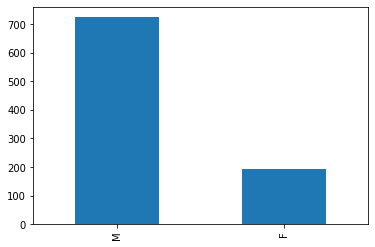

In [10]:
df['Sex'].value_counts().plot(kind = 'bar')

In [11]:
px.bar(df['Sex'].value_counts(),width=600,height=500)

In [12]:
fig = px.pie(df,names='Sex',height=400,width=600, labels = {'M':'Male','F':'Female'},title='Count of Gender')
fig.show()

In [13]:
df.pivot_table('HeartDisease',index = 'Sex')*100

,HeartDisease
Sex,
F,25.906736
M,63.172414


**Average of People with Heart Disease based on their Gender. we can see that most of the males on our datasets have Heart Disease.**

In [14]:
age_range = pd.cut(df['Age'], 5)
df.groupby(age_range)['HeartDisease'].mean()

Age
(27.951, 37.8]    0.265306
(37.8, 47.6]      0.378947
(47.6, 57.4]      0.535817
(57.4, 67.2]      0.717391
(67.2, 77.0]      0.703704
Name: HeartDisease, dtype: float64

In [15]:
np.round(df.pivot_table('HeartDisease',index='Sex',columns=age_range)*100,2)

Age,"(27.951, 37.8]","(37.8, 47.6]","(47.6, 57.4]","(57.4, 67.2]","(67.2, 77.0]"
Sex,,,,,
F,7.69,13.95,22.08,48.08,12.50
M,33.33,44.90,62.50,77.23,80.43


**As seen from the above table that females from 57-67 years has high average of Heart Disease while Males from 47 to above mostly have High Disease.**

In [16]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [17]:
df.groupby('ChestPainType').sum()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
ChestPainType,,,,,,,
ASY,27260,66082,92576,141,63725,576.7,392
ATA,8519,22598,40317,19,25986,53.2,24
NAP,10822,26585,40080,41,29077,137.0,72
TA,2522,6275,9525,13,6803,47.7,20


In [18]:
df.groupby('ChestPainType')['HeartDisease'].sum()

ChestPainType
ASY    392
ATA     24
NAP     72
TA      20
Name: HeartDisease, dtype: int64

In [19]:
df.groupby('ChestPainType')['HeartDisease'].mean()*100

ChestPainType
ASY    79.032258
ATA    13.872832
NAP    35.467980
TA     43.478261
Name: HeartDisease, dtype: float64

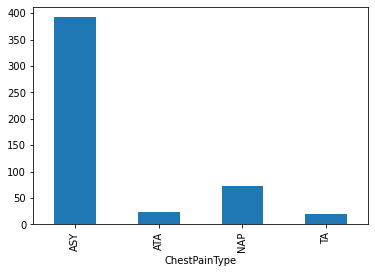

In [20]:
df.groupby('ChestPainType')['HeartDisease'].sum().plot(kind = 'bar')

**We can see that people with ASY ChestPaintType are more likely to have Heart Disease than others. Let's check and see if this holds True based on individual Sex.**

In [21]:
df.pivot_table('HeartDisease',index='Sex',columns='ChestPainType',aggfunc='sum')

ChestPainType,ASY,ATA,NAP,TA
Sex,,,,
F,39,4,6,1
M,353,20,66,19


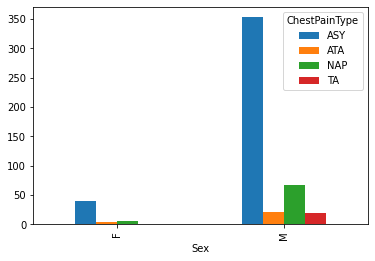

In [22]:
(df.pivot_table('HeartDisease',index='Sex',columns='ChestPainType',aggfunc='sum')).plot(kind='bar')

In [24]:
px.bar(df.pivot_table('HeartDisease',index='Sex',columns='ChestPainType',aggfunc='sum'))

**Interesting! No matter what the Gender is, People With ASY ChestPaintType are more likely to have Heart Disease.**

In [25]:
df.groupby('RestingECG')['HeartDisease'].mean()*100

RestingECG
LVH       56.382979
Normal    51.630435
ST        65.730337
Name: HeartDisease, dtype: float64

In [26]:
px.bar(df.groupby('RestingECG')['HeartDisease'].mean()*100)

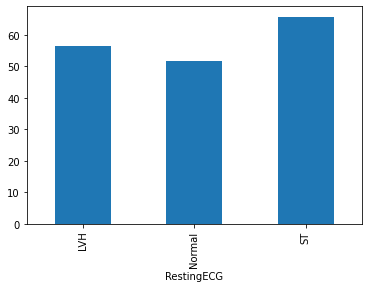

In [27]:
(df.groupby('RestingECG')['HeartDisease'].mean()*100).plot(kind='bar')

**The RestingECG Seems to balance for both LHV and Normal expect for ST which has about 65% Individuals having HeartDisease.**

In [28]:
df.pivot_table('HeartDisease',index='Sex',columns='RestingECG',aggfunc='sum')

RestingECG,LVH,Normal,ST
Sex,,,
F,14,29,7
M,92,256,110


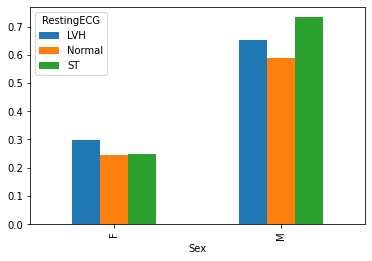

In [29]:
(df.pivot_table('HeartDisease',index='Sex',columns='RestingECG',aggfunc='mean')).plot(kind='bar')

In [30]:
df.groupby('ExerciseAngina')['HeartDisease'].mean()*100

ExerciseAngina
N    35.100548
Y    85.175202
Name: HeartDisease, dtype: float64

**Again 85% of People with ExerciseAngina have HeartDisease**



In [31]:
(df.pivot_table('HeartDisease', index='Sex', columns='ExerciseAngina')*100).round(2)

ExerciseAngina,N,Y
Sex,,
F,15.33,62.79
M,42.57,88.11


In [32]:
(df.groupby('ST_Slope')['HeartDisease'].mean() * 100).round(2)

ST_Slope
Down    77.78
Flat    82.83
Up      19.75
Name: HeartDisease, dtype: float64

**People with Up ST_Slope have lower rate of HeartDisease than others.**



In [33]:
(df.pivot_table('HeartDisease', index='Sex', columns='ST_Slope')*100).round(2)

ST_Slope,Down,Flat,Up
Sex,,,
F,71.43,52.00,5.41
M,78.57,88.83,25.35


**Numerical Columns**

In [34]:
numericalCol

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [35]:
df[numericalCol].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [36]:
px.scatter(df, x='MaxHR',y='Age',color='HeartDisease',trendline='ols',title='Effect of Heart Rate and Age on Diseases')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



**People with Higher age group having Low Heart rate are more prone to Heart Diseases**

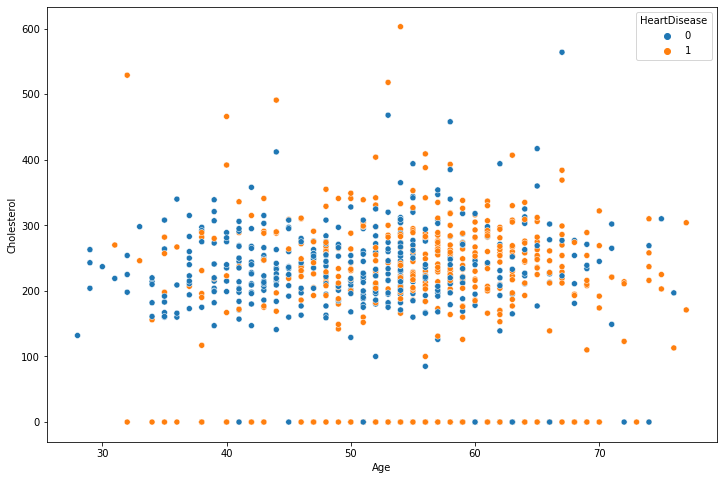

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Age',y='Cholesterol',hue='HeartDisease')

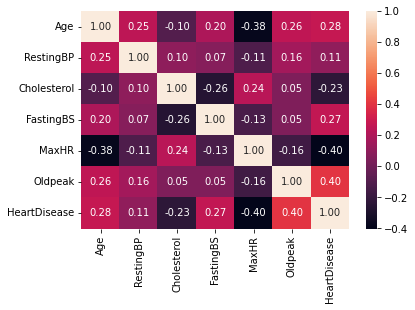

In [38]:
corr = df[numericalCol].corr()
sns.heatmap(corr,annot=True,fmt='.2f')

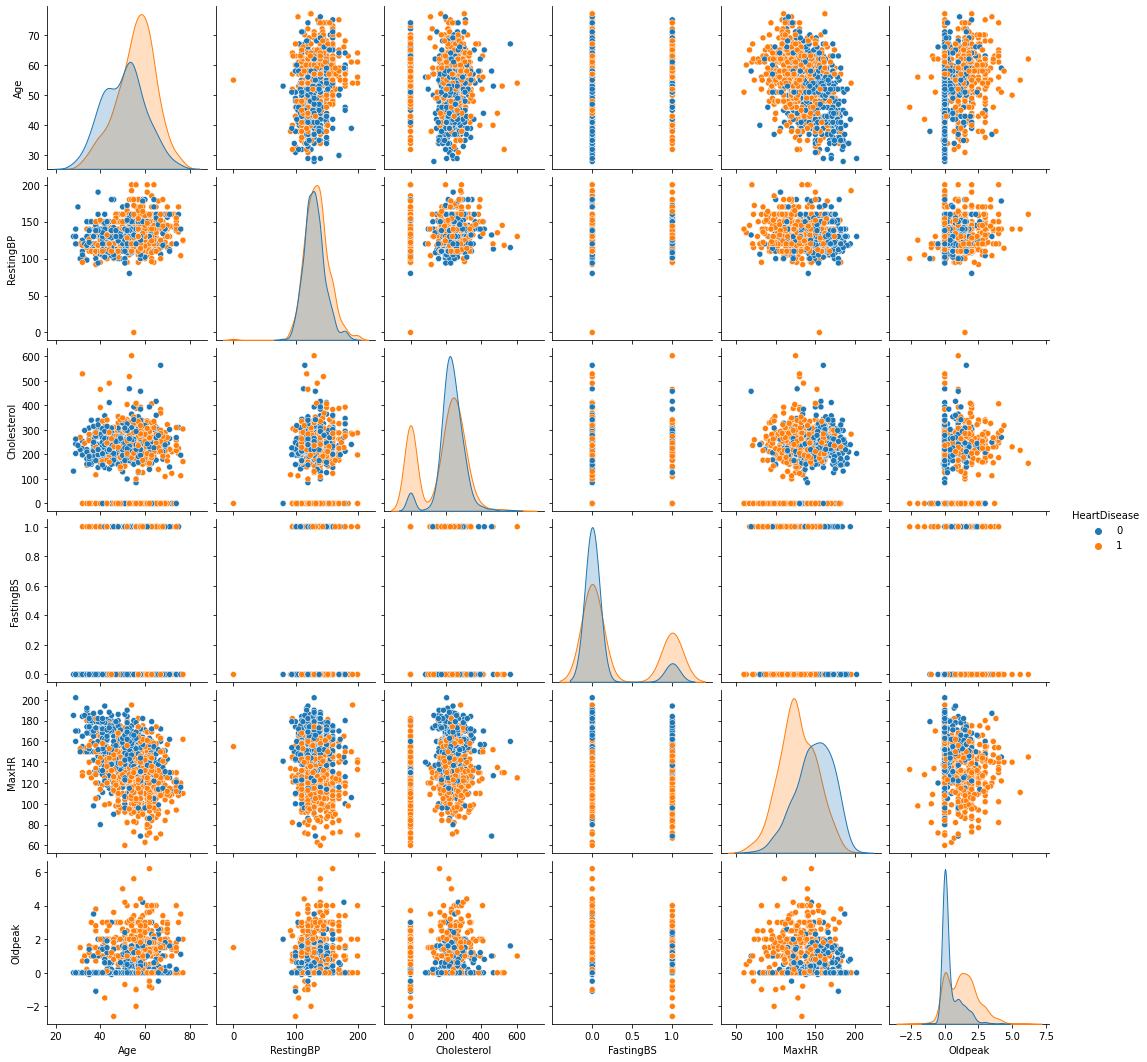

In [39]:
sns.pairplot(df,hue='HeartDisease')

**Conclusion**
>From the above analysis we can see that most of our categorical features has some relationship with our Target Variable. While the numerical features are less more important but nevertheless we are going to include both to our model. and also most of the males in our Dataset have Heart Disease.

**Outliers**
>Using boxplots it's easy and fast to see the outliers as it represents those points clearly on the plot.

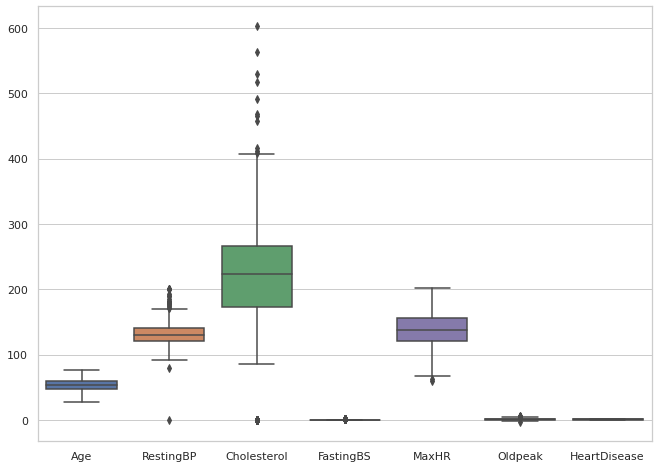

In [40]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1, style='whitegrid')
sns.boxplot(data=df)

>With a quick research we can see some values with RestingBP near zero, which is not possible. Also there are some values with Cholesterol near zero which is not possible also. Let's analizy how many of them are and how we can impute them.

####Here I will replace the RestingBP equal zero with the median as this is more resistant to outliers that the mean

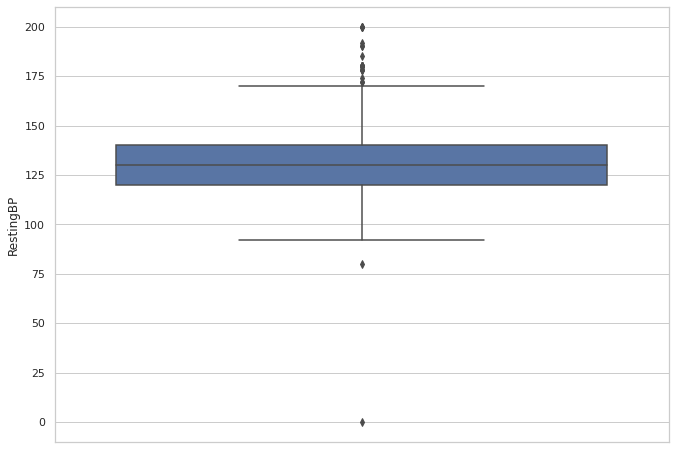

In [42]:
sns.boxplot(data=df,y="RestingBP")

In [43]:
# Let's search the outlier
df[df['RestingBP'] <50]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [44]:
df.drop(df.index[449],inplace=True)

In [45]:
df[df['RestingBP'] <50]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


>Here we see the entry do not has RestingBP Cholesterol and FastingBS. I will drop it because it is one entry in one thousand. If we had more data to represent we should use a method to imputate the values. Now let's search the values with zero value of Cholesterol.

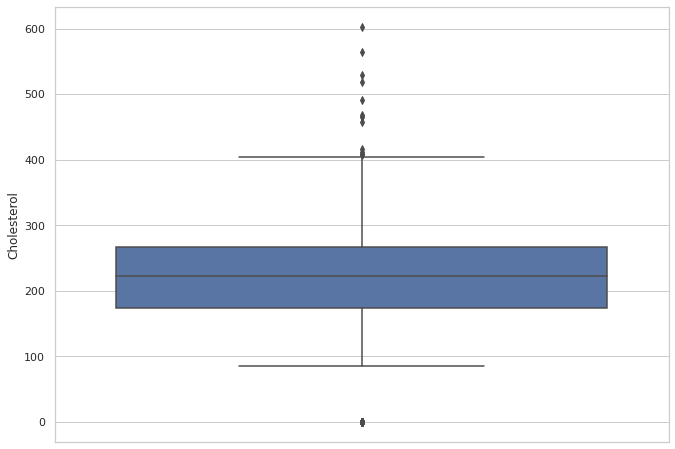

In [46]:
sns.boxplot(data=df,y="Cholesterol")

In [47]:
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


###Almost 10% of the dataset has this value missing. Before making assumptions I will see which is the distribution of HeartDisease within these points. Then I will justify a method to impute the values.

In [48]:
df[df["Cholesterol"] ==0]['HeartDisease'].value_counts()

1    151
0     20
Name: HeartDisease, dtype: int64

In [49]:
df[df["Cholesterol"] ==0]['HeartDisease'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    88.3%
0    11.7%
Name: HeartDisease, dtype: object

>Here we can see that the 88% of the entries here has a heart disease so this is highly skewed. In order to impute skewed data I will use the median of the values of Cholesterol with heart disease. I will do this because nearly all the entries have heart disease and the median of this values is resistant to outliers.

In [50]:
#This line of code gives me the non zero values of cholesterol with heart disease.
mask = (df['Cholesterol'] !=0) & (df['HeartDisease'] ==1)
df.loc[mask]['Cholesterol'].median()

246.0

**I'll impute with this value**

In [52]:
df.loc[df['Cholesterol'] ==0,"Cholesterol"] = df.loc[mask]['Cholesterol'].median()

>Let's see how the distribution is modified and if the correlation between heart disease and cholesterol has changed

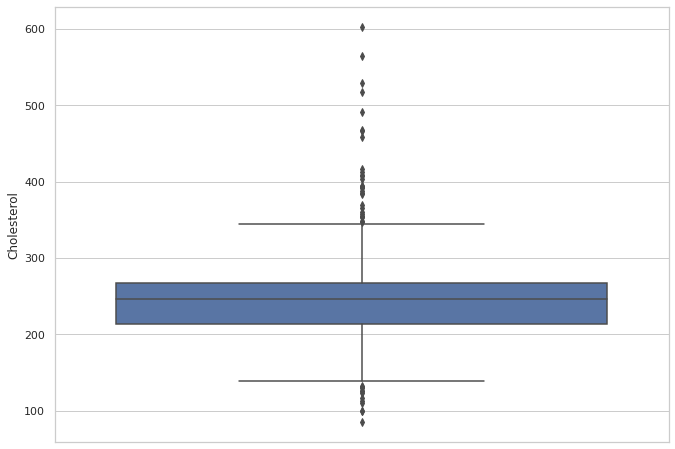

In [53]:
# let's check the boxplot of cholesterol again
sns.boxplot(data=df,y="Cholesterol")

In [54]:
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


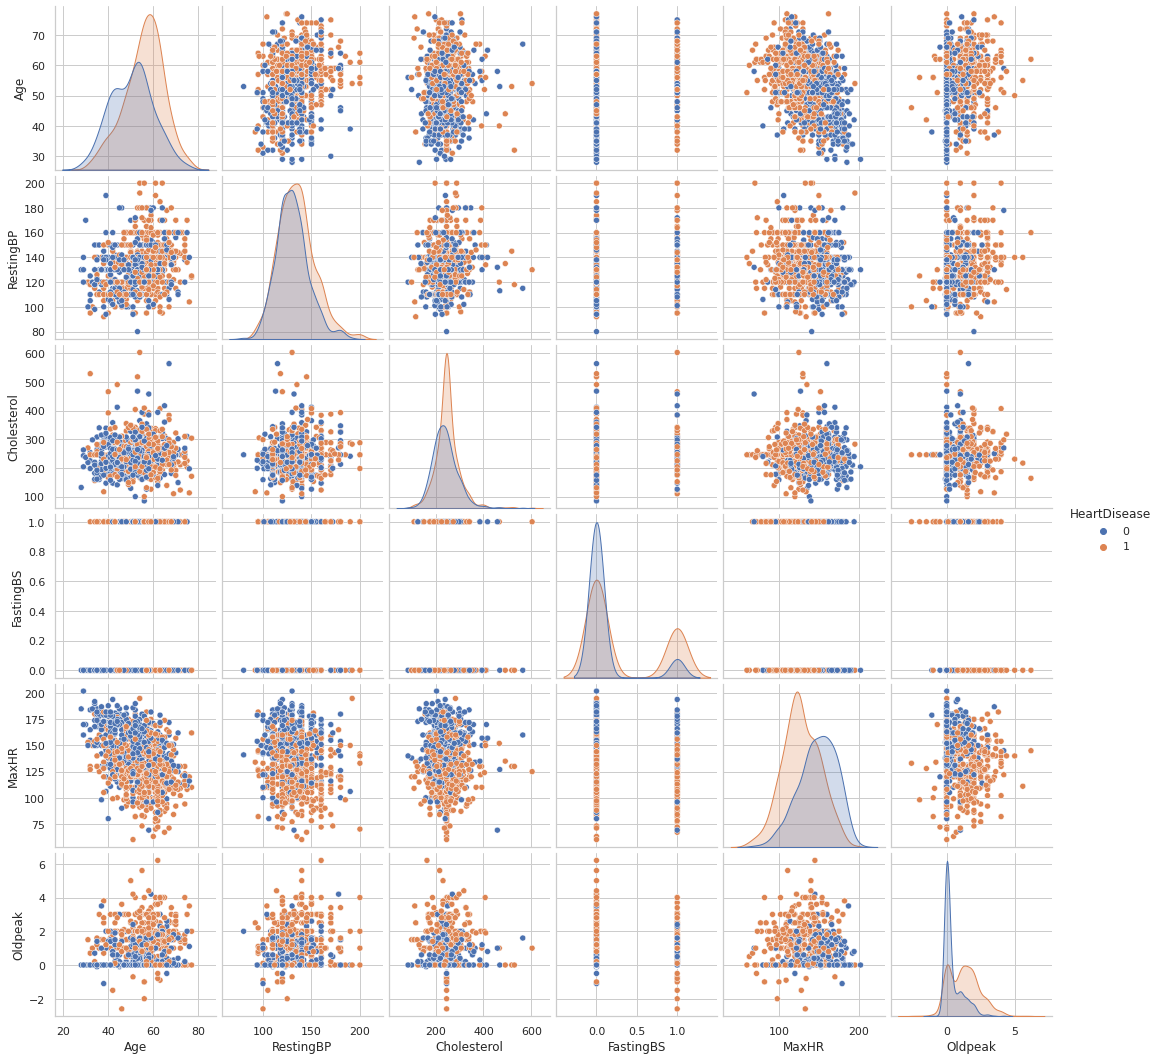

In [55]:
sns.pairplot(data=df,hue='HeartDisease')

>Here we can see that the distribution of Cholesterol has changed and also the correlation. From having a negative correlation with heart disease now it is positive. This makes sense as this is one of the first estimators a doctor uses to suggest further analysis.

In [56]:
df.corr()['Cholesterol']['HeartDisease']

0.09727708167111189

In [57]:
px.scatter(df,x='Age',y='Cholesterol',color='HeartDisease')

**Categorical Columns**

In [58]:
categoricalCol

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [59]:
df[categoricalCol].describe().T

,count,unique,top,freq
Sex,917,2,M,724
ChestPainType,917,4,ASY,496
RestingECG,917,3,Normal,551
ExerciseAngina,917,2,N,546
ST_Slope,917,3,Flat,459


In [60]:
df['Sex'].value_counts()

M    724
F    193
Name: Sex, dtype: int64

In [61]:
df['ChestPainType'].value_counts()

ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [62]:
df['RestingECG'].value_counts()

Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [63]:
df['ST_Slope'].value_counts()

Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [64]:
df['ExerciseAngina'].value_counts()

N    546
Y    371
Name: ExerciseAngina, dtype: int64

In [65]:
#making a copy of the database
df_new = df.copy()

In [66]:
df_new.shape

(917, 12)

In [67]:
df_new.sample(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
96,43,M,ATA,142,207,0,Normal,138,N,0.0,Up,0
196,49,M,ASY,120,297,0,Normal,132,N,1.0,Flat,0
422,65,M,ASY,150,236,1,ST,105,Y,0.0,Flat,1


>Converting the categorical column into codes

In [68]:
df_new[categoricalCol] = df_new[categoricalCol].astype('category')
df_new[categoricalCol] = df_new[categoricalCol].apply(lambda x:x.cat.codes)

In [69]:
df_new[categoricalCol]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


In [70]:
print(np.unique(df_new.ChestPainType))

[0 1 2 3]


In [71]:
df_new.sample(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
473,60,1,2,141,316,1,2,122,1,1.7,1,1
357,53,1,1,120,246,0,1,95,0,0.0,1,1
274,45,0,1,180,295,0,1,180,0,0.0,2,0


In [72]:
df_new2 = df.copy()

In [73]:
df_new2.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [74]:
c= df_new2.Sex.astype('category')
d = dict(enumerate(c.cat.categories))
print(d)

{0: 'F', 1: 'M'}


In [75]:
c= df_new2.ChestPainType.astype('category')
d = dict(enumerate(c.cat.categories))
print(d)

{0: 'ASY', 1: 'ATA', 2: 'NAP', 3: 'TA'}


**Training and Testing Data**

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X = df_new.drop(['HeartDisease'], axis = 1)
y = df_new['HeartDisease']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [78]:
X_train.shape,X_test.shape

((733, 11), (184, 11))

**Importing all the Models**

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#predicting without feature selection and standaridization

In [80]:
#metrics for predicting scores
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

## Training the data with different models

>Logistic Regression

In [81]:
model_logistic = LogisticRegression(max_iter=800)
model_logistic.fit(X_train,y_train)

LogisticRegression(max_iter=800)

In [82]:
predLogistic = model_logistic.predict(X_test)

In [83]:
confusion_matrix(y_test,predLogistic)

array([[66, 18],
       [ 7, 93]])

In [84]:
accuracyLogistic = accuracy_score(y_test,predLogistic)
accuracyLogistic

0.8641304347826086

In [85]:
recallLogistic = recall_score(y_test,predLogistic)
recallLogistic

0.93

In [86]:
precisionLogistic = precision_score(y_test,predLogistic)
precisionLogistic

0.8378378378378378

In [87]:
f1Logistic = f1_score(y_test,predLogistic)
f1Logistic

0.8815165876777251

>Decision Tree Classifier

In [88]:
modelDecision = DecisionTreeClassifier()
modelDecision.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
predDecision = modelDecision.predict(X_test)

In [90]:
confusion_matrix(y_test,predDecision)

array([[62, 22],
       [21, 79]])

In [91]:
accuracyDecision = accuracy_score(y_test,predDecision)
accuracyDecision

0.7663043478260869

In [92]:
recallDecision = recall_score(y_test,predDecision)
recallDecision

0.79

In [93]:
precisionDecision = precision_score(y_test,predDecision)
precisionDecision

0.7821782178217822

In [94]:
f1Decision = f1_score(y_test,predDecision)
f1Decision

0.7860696517412936

>Random Forest

In [95]:
modelRandom = RandomForestClassifier()
modelRandom.fit(X_train,y_train)

RandomForestClassifier()

In [96]:
predRandom = modelRandom.predict(X_test)

In [97]:
confusion_matrix(y_test,predRandom)

array([[69, 15],
       [ 6, 94]])

In [98]:
accuracyRandom = accuracy_score(y_test,predRandom)
accuracyRandom

0.8858695652173914

In [99]:
recallRandom = recall_score(y_test,predRandom)
recallRandom

0.94

In [100]:
precisionRandom = precision_score(y_test,predRandom)
precisionRandom

0.8623853211009175

In [101]:
f1Random = f1_score(y_test,predRandom)
f1Random

0.8995215311004784

>Ada Boost Classifier

In [102]:
modelAdaBoost = AdaBoostClassifier()
modelAdaBoost.fit(X_train,y_train)

AdaBoostClassifier()

In [103]:
predAdaBoost = modelAdaBoost.predict(X_test)

In [104]:
confusion_matrix(y_test,predAdaBoost)

array([[66, 18],
       [10, 90]])

In [105]:
accuracyAdaBoost = accuracy_score(y_test,predAdaBoost)
accuracyAdaBoost

0.8478260869565217

In [106]:
recallAdaBoost = recall_score(y_test,predAdaBoost)
recallAdaBoost

0.9

In [107]:
precisionAdaBoost = precision_score(y_test,predAdaBoost)
precisionAdaBoost

0.8333333333333334

In [108]:
f1AdaBoost = f1_score(y_test,predAdaBoost)
f1AdaBoost

0.8653846153846153

>Gradient Boosting Classifier

In [109]:
modelGradient = GradientBoostingClassifier()
modelGradient.fit(X_train,y_train)

GradientBoostingClassifier()

In [110]:
predGradient = modelGradient.predict(X_test)

In [111]:
confusion_matrix(y_test,predGradient)

array([[71, 13],
       [ 6, 94]])

In [112]:
accuracyGradient = accuracy_score(y_test,predGradient)
accuracyGradient

0.8967391304347826

In [113]:
recallGradient = recall_score(y_test,predGradient)
recallGradient

0.94

In [114]:
precisionGradient = precision_score(y_test,predGradient)
precisionGradient

0.8785046728971962

In [115]:
f1Gradient = f1_score(y_test,predGradient)
f1Gradient

0.9082125603864735

>Support Vector Classifier

In [116]:
modelSVM = SVC()
modelSVM.fit(X_train,y_train)

SVC()

In [118]:
predSVM = modelSVM.predict(X_test)

In [119]:
confusion_matrix(y_test,predSVM)

array([[44, 40],
       [16, 84]])

In [120]:
accuracySVM = accuracy_score(y_test,predSVM)
accuracySVM

0.6956521739130435

In [121]:
recallSVM = recall_score(y_test,predSVM)
recallSVM

0.84

In [122]:
precisionSVM = precision_score(y_test,predSVM)
precisionSVM

0.6774193548387096

In [123]:
f1SVM = f1_score(y_test,predSVM)
f1SVM

0.75

>XGB

In [124]:
modelXGB = XGBClassifier()
modelXGB.fit(X_train,y_train)

XGBClassifier()

In [125]:
predXGB = modelXGB.predict(X_test)

In [126]:
confusion_matrix(y_test,predXGB)

array([[72, 12],
       [ 5, 95]])

In [127]:
accuracyXGB = accuracy_score(y_test,predXGB)
accuracyXGB

0.907608695652174

In [128]:
recallXGB = recall_score(y_test,predXGB)
recallXGB

0.95

In [129]:
precisionXGB = precision_score(y_test,predXGB)
precisionXGB

0.8878504672897196

In [130]:
f1XGB = f1_score(y_test,predXGB)
f1XGB

0.9178743961352657

## Comparision of different matrix used

**Accuracy comparision of all the models used above**


In [131]:
accuracy = [accuracyLogistic,accuracyDecision,accuracyRandom,accuracyAdaBoost,accuracyGradient,accuracySVM,accuracyXGB]
model = ['LogisticRegression','DecisionTree','RandomForest','AdaBoost','GradientBoosting','SupportVector','XGB']
modelAccuracy = pd.DataFrame(data={'Model':model,'Accuracy':accuracy})

In [132]:
modelAccuracy.sort_values(by=['Accuracy'],ascending=False,inplace=True)

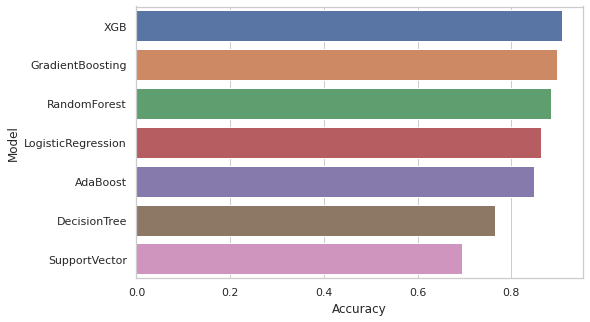

In [133]:
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=modelAccuracy)

>Without feature selection and standardization we can see that XBG gives the highest accuracy

**Recall comparision of all the models used above**

In [134]:
recall = [recallLogistic,recallDecision,recallRandom,recallAdaBoost,recallGradient,recallSVM,recallXGB]
model = ['LogisticRegression','DecisionTree','RandomForest','AdaBoost','GradientBoosting','SupportVector','XGB']
modelRecall = pd.DataFrame(data={'Model':model,'Recall':recall})

In [135]:
modelRecall.sort_values(by=['Recall'],ascending=False,inplace=True)

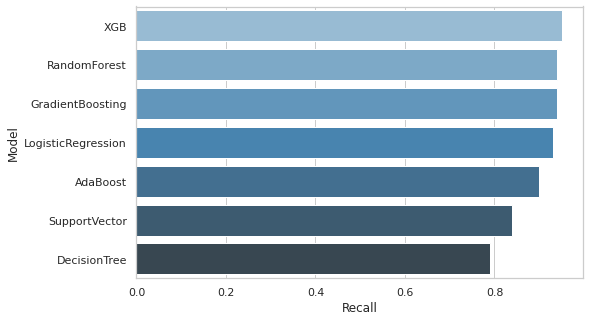

In [144]:
plt.figure(figsize=(8,5))
sns.barplot(x='Recall', y='Model', data=modelRecall, palette="Blues_d")

>Without feature selection and standardization we can see that XBG gives the highest recall

**Precision comparision of all the models used above**





In [140]:
precision = [precisionLogistic,precisionDecision,precisionRandom,precisionAdaBoost,precisionGradient,precisionSVM,precisionXGB]
model = ['LogisticRegression','DecisionTree','RandomForest','AdaBoost','GradientBoosting','SupportVector','XGB']
modelPrecision = pd.DataFrame(data={'Model':model,'Precision':precision})

In [141]:
modelPrecision.sort_values(by=['Precision'],ascending=False,inplace=True)

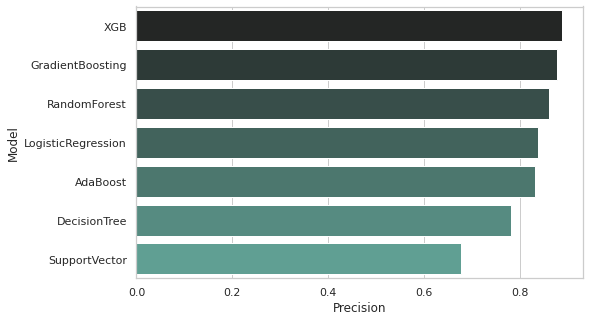

In [149]:
plt.figure(figsize=(8,5))
sns.barplot(x='Precision', y='Model', data=modelPrecision, palette="dark:#5A9")

>Without feature selection and standardization we can see that XBG gives the highest precision

**f1_score comparision of all the models used above**


In [150]:
f1 = [f1Logistic,f1Decision,f1Random,f1AdaBoost,f1Gradient,f1SVM,f1XGB]
model = ['LogisticRegression','DecisionTree','RandomForest','AdaBoost','GradientBoosting','SupportVector','XGB']
modelf1 = pd.DataFrame(data={'Model':model,'f1':f1})

In [151]:
modelf1.sort_values(by=['f1'],ascending=False,inplace=True)

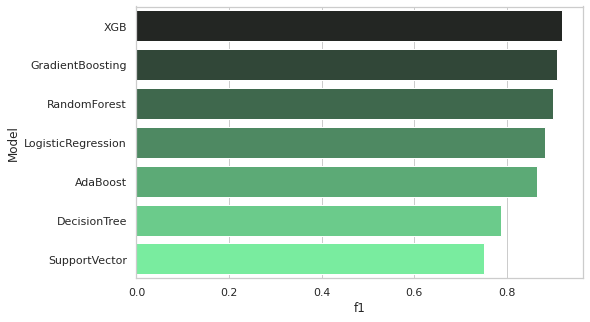

In [153]:
plt.figure(figsize=(8,5))
sns.barplot(x='f1', y='Model', data=modelf1, palette="dark:#6f9")

>Without feature selection and standardization we can see that XBG gives the highest f1

#With Feature Selection and standardization
>featureSelection Technique --> correlation

In [154]:
df_featureSelection= df_new.copy()

In [155]:
df_featureSelection.sample(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
855,68,1,2,180,274,1,0,150,1,1.6,1,1
594,58,1,0,160,256,1,0,113,1,1.0,2,1


In [156]:
X_train,X_test,y_train,y_test = train_test_split(df_featureSelection.drop("HeartDisease",axis=1),df_featureSelection['HeartDisease'],test_size=0.2)

In [157]:
X_train.shape,X_test.shape

((733, 11), (184, 11))

In [172]:
X_train.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
Age,1.000000,0.055534,-0.078542,0.240164,0.075312,0.204452,-0.006568,-0.383963,0.219441,0.274082,-0.281643
Sex,0.055534,1.000000,-0.116890,-0.006924,-0.129928,0.118544,0.086108,-0.198313,0.173502,0.098706,-0.159733
ChestPainType,-0.078542,-0.116890,1.000000,-0.003234,-0.099065,-0.097852,-0.075830,0.295331,-0.370677,-0.198529,0.235956
RestingBP,0.240164,-0.006924,-0.003234,1.000000,0.066181,0.059530,-0.004301,-0.116640,0.169371,0.174154,-0.102226
Cholesterol,0.075312,-0.129928,-0.099065,0.066181,1.000000,0.038919,-0.070494,-0.003341,0.095438,0.061426,-0.059815
FastingBS,0.204452,0.118544,-0.097852,0.059530,0.038919,1.000000,0.103627,-0.172281,0.073428,0.056899,-0.183875
RestingECG,-0.006568,0.086108,-0.075830,-0.004301,-0.070494,0.103627,1.000000,-0.171214,0.040676,-0.050544,0.038295
MaxHR,-0.383963,-0.198313,0.295331,-0.116640,-0.003341,-0.172281,-0.171214,1.000000,-0.342176,-0.137474,0.324764
ExerciseAngina,0.219441,0.173502,-0.370677,0.169371,0.095438,0.073428,0.040676,-0.342176,1.000000,0.406807,-0.433507
Oldpeak,0.274082,0.098706,-0.198529,0.174154,0.061426,0.056899,-0.050544,-0.137474,0.406807,1.000000,-0.499538


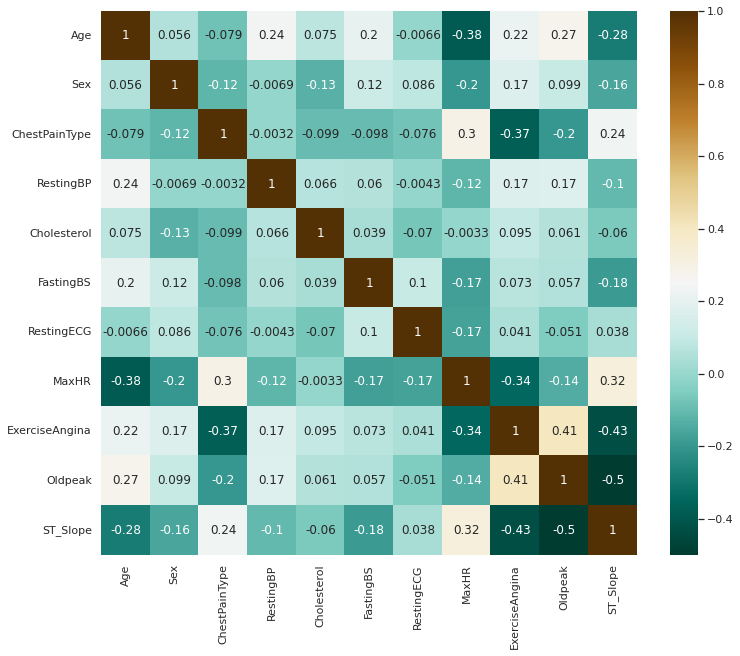

In [173]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.BrBG_r)
plt.show()

In [174]:
#with this function we can select highly correlated features
# it will remove the first feature that is correlated with other features

def correlation(dataset,threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [179]:
corr_features = correlation(X_train,0.4)

In [180]:
corr_features

{'Oldpeak', 'ST_Slope'}

In [181]:
# Removing the corr features
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina
812,54,0,2,110,214,0,1,158,0
536,62,1,2,133,246,1,2,119,1
200,47,1,3,110,249,0,1,150,0
789,34,1,3,118,182,0,0,174,0
756,59,1,0,138,271,0,0,182,0
...,...,...,...,...,...,...,...,...,...
328,52,1,0,95,246,1,1,82,1
715,44,0,2,108,141,0,1,175,0
403,52,1,0,135,246,1,1,128,1
784,65,1,3,138,282,1,0,174,0


In [182]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [183]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [184]:
scaled_X_train

array([[ 1.86566206, -1.91540852,  0.25098625, ..., -0.81371464,
        -0.45781339,  1.03482784],
       [ 0.89746094,  0.52208184,  1.31441355, ...,  1.22893205,
         0.29396979, -0.59993252],
       [ 1.00503884,  0.52208184, -0.81244104, ...,  1.22893205,
         0.10602399,  1.03482784],
       ...,
       [ 0.68230514,  0.52208184,  1.31441355, ...,  1.22893205,
         0.76383428, -0.59993252],
       [-0.17831808,  0.52208184, -0.81244104, ...,  1.22893205,
         0.10602399, -0.59993252],
       [-1.14651919,  0.52208184, -0.81244104, ..., -0.81371464,
         0.29396979, -0.59993252]])

## Training with different models

>Logistic Regression

In [185]:
model_logisticScaled = LogisticRegression()
grid_logistic = {"C":[0.1,1,10,100,1000]}


In [186]:
gridSearch_logistic = GridSearchCV(model_logisticScaled,grid_logistic,cv=5)

In [187]:
gridSearch_logistic.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000]})

In [188]:
predLogisticScaled = gridSearch_logistic.predict(scaled_X_test)

In [189]:
confusion_matrix(y_test,predLogisticScaled)

array([[60, 23],
       [19, 82]])

In [190]:
accuracyLogisticScaled = accuracy_score(y_test,predLogisticScaled)
accuracyLogisticScaled

0.7717391304347826

In [191]:
gridSearch_logistic.best_params_

{'C': 0.1}

In [192]:
recallLogisticScaled = recall_score(y_test,predLogisticScaled)
recallLogisticScaled


0.8118811881188119

In [193]:
precisionLogisticScaled = precision_score(y_test,predLogisticScaled)
precisionLogisticScaled

0.780952380952381

In [194]:
f1LogisticScaled = f1_score(y_test,predLogisticScaled)
f1LogisticScaled

0.7961165048543689

>Decision Tree Classifier

In [195]:
model_decisionScaled = DecisionTreeClassifier(criterion='entropy')
grid_decision = {"max_depth" : [1,2,3,4,5,6,7,8,9]}


In [196]:
gridSearch_decision = GridSearchCV(model_decisionScaled,grid_decision,cv=5)

In [197]:
gridSearch_decision.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [198]:
predDecisionScaled = gridSearch_decision.predict(scaled_X_test)

In [199]:
confusion_matrix(y_test,predDecisionScaled)


array([[69, 14],
       [23, 78]])

In [200]:
accuracyDecisionScaled = accuracy_score(y_test,predDecisionScaled)
accuracyDecisionScaled

0.7989130434782609

In [201]:
# depth of the tree
gridSearch_decision.best_params_

{'max_depth': 3}

In [202]:
recallDecisionScaled = recall_score(y_test,predDecisionScaled)
recallDecisionScaled

0.7722772277227723

In [203]:
precisionDecisionScaled = precision_score(y_test,predDecisionScaled)
precisionDecisionScaled

0.8478260869565217

In [204]:
f1DecisionScaled = f1_score(y_test,predDecisionScaled)
f1DecisionScaled

0.8082901554404146

>Random Forest

In [205]:
model_randomScaled = RandomForestClassifier(criterion='entropy')
#To optimize information gain
grid_forest = {"n_estimators" : [1000,2000,3000,4000,5000]}
gridSearch_forest = GridSearchCV(model_randomScaled,grid_forest,cv = 5)

In [206]:
gridSearch_forest.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'n_estimators': [1000, 2000, 3000, 4000, 5000]})

In [207]:
predRandomScaled = gridSearch_forest.predict(scaled_X_test)

In [208]:
confusion_matrix(y_test,predRandomScaled)


array([[57, 26],
       [10, 91]])

In [209]:
accuracyRandomScaled = accuracy_score(y_test,predRandomScaled)
accuracyRandomScaled

0.8043478260869565

In [210]:
gridSearch_forest.best_params_

{'n_estimators': 2000}

In [212]:
recallRandomScaled = recall_score(y_test,predRandomScaled)
recallRandomScaled

0.900990099009901

In [213]:
precisionRandomScaled = precision_score(y_test,predRandomScaled)
precisionRandomScaled

0.7777777777777778

In [214]:
f1RandomScaled = f1_score(y_test,predRandomScaled)
f1RandomScaled

0.8348623853211009

>Ada Boost Classifier

In [215]:
model_adaboostScaled = AdaBoostClassifier(n_estimators=100)
model_adaboostScaled.fit(scaled_X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [216]:
predAdaBoostScaled = model_adaboostScaled.predict(scaled_X_test)

In [217]:
confusion_matrix(y_test,predAdaBoostScaled)

array([[59, 24],
       [16, 85]])

In [218]:
accuracyAdaBoostScaled = accuracy_score(y_test,predAdaBoostScaled)
accuracyAdaBoostScaled

0.782608695652174

In [219]:
recallAdaBoostScaled = recall_score(y_test,predAdaBoostScaled)
recallAdaBoostScaled

0.8415841584158416

In [220]:
precisionAdaBoostScaled = precision_score(y_test,predAdaBoostScaled)
precisionAdaBoostScaled

0.7798165137614679

In [222]:
f1AdaBoostScaled = f1_score(y_test,predAdaBoostScaled)
f1AdaBoostScaled

0.8095238095238095

>Gradient Boosting Classifier

In [223]:
model_gradientScaled = GradientBoostingClassifier(max_depth=5)
model_gradientScaled.fit(scaled_X_train,y_train)

GradientBoostingClassifier(max_depth=5)

In [224]:
predGradientScaled = model_gradientScaled.predict(scaled_X_test)

In [225]:
confusion_matrix(y_test,predGradientScaled)

array([[60, 23],
       [10, 91]])

In [226]:
accuracyGradientScaled = accuracy_score(y_test,predGradientScaled)
accuracyGradient

0.8967391304347826

In [227]:
recallGradientScaled = recall_score(y_test,predGradientScaled)
recallGradientScaled

0.900990099009901

In [228]:
precisionGradientScaled = precision_score(y_test,predGradientScaled)
precisionGradientScaled

0.7982456140350878

In [229]:
f1GradientScaled = f1_score(y_test,predGradientScaled)
f1GradientScaled

0.8465116279069768

>Support vector classifier

In [230]:
model_SVM = SVC(kernel="rbf")
grid_svc = {"gamma":[0.001,0.01,0.1,1,10],"C":[0.1,1,10,100,1000]}
gridSearch_svc = GridSearchCV(model_SVM,grid_svc,cv = 5)

In [231]:
gridSearch_svc.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]})

In [232]:
predSVCScaled = gridSearch_svc.predict(scaled_X_test)

In [233]:
confusion_matrix(y_test,predSVCScaled)


array([[62, 21],
       [17, 84]])

In [234]:
accuracySVCScaled = accuracy_score(y_test,predSVCScaled)
accuracySVCScaled

0.7934782608695652

In [236]:
recallSVCScaled = recall_score(y_test,predSVCScaled)
recallSVCScaled

0.8316831683168316

In [237]:
precisionSVCScaled = precision_score(y_test,predSVCScaled)
precisionSVCScaled

0.8

In [238]:
f1SVCScaled = f1_score(y_test,predSVCScaled)
f1SVCScaled

0.8155339805825242

>XGB classifier

In [239]:
model_XGBScaled = XGBClassifier(use_label_encoder=False,n_estimators=2000)

In [240]:
model_XGBScaled.fit(scaled_X_train,y_train)

XGBClassifier(n_estimators=2000, use_label_encoder=False)

In [241]:
predXGBScaled = model_XGBScaled.predict(scaled_X_test)

In [242]:
confusion_matrix(y_test,predXGBScaled)

array([[61, 22],
       [ 9, 92]])

In [243]:
accuracyXGBScaled = accuracy_score(y_test,predXGBScaled)
accuracyXGBScaled

0.8315217391304348

In [244]:
precisionXGBScaled = precision_score(y_test,predXGBScaled)
precisionXGBScaled

0.8070175438596491

In [245]:
recallXGBScaled = recall_score(y_test,predXGBScaled)
recallXGBScaled

0.9108910891089109

In [246]:
f1XGBScaled = f1_score(y_test,predXGBScaled)
f1XGBScaled

0.8558139534883721

## Comparision of different matrix used

**Accuracy comparision of all the models used above**

In [247]:
accuracy_scaled = [accuracyLogisticScaled,accuracyDecisionScaled,accuracyRandomScaled,accuracyAdaBoostScaled,accuracyGradientScaled,accuracySVCScaled,accuracyXGBScaled]
model_scaled = ['LogisticRegression','DecisionTree','RandomForest','AdaBoost','GradientBoosting','SupportVector','XGB']

In [248]:
modelAccuracyScaled = pd.DataFrame(data={'Model':model_scaled,'Accuracy':accuracy_scaled})

In [249]:
modelAccuracyScaled.sort_values(by=['Accuracy'],ascending=False,inplace=True)

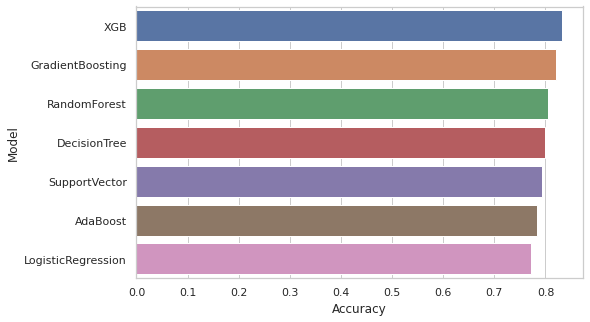

In [250]:
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=modelAccuracyScaled)

>With feature selection and standardization we can see that XGB gives the highest accuracy

**Precision comparision of all the models used above**

In [252]:
precision_scaled = [precisionLogisticScaled,precisionDecisionScaled,precisionRandomScaled,precisionAdaBoostScaled,precisionGradientScaled,precisionSVCScaled,precisionXGBScaled]
model_scaled = ['LogisticRegression','DecisionTree','RandomForest','AdaBoost','GradientBoosting','SupportVector','XGB']

In [253]:
modelPrecisonScaled = pd.DataFrame(data={'Model':model_scaled,'Precision':precision_scaled})

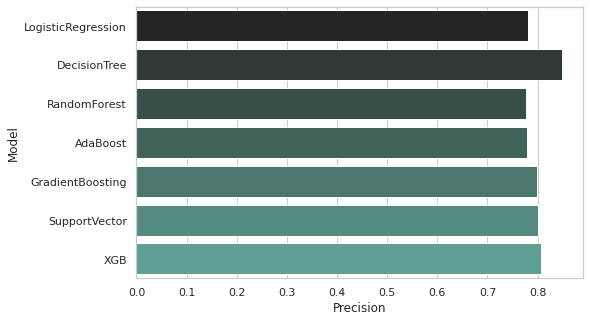

In [255]:
plt.figure(figsize=(8,5))
sns.barplot(x='Precision', y='Model', data=modelPrecisonScaled,palette="dark:#5A9")

>With feature selection and standardization we can see that DecisionTree gives the highest precision

**Recall comparision of all the models used above**

In [256]:
recall_scaled = [recallLogisticScaled,recallDecisionScaled,recallRandomScaled,recallAdaBoostScaled,recallGradientScaled,recallSVCScaled,recallXGBScaled]
model_scaled = ['LogisticRegression','DecisionTree','RandomForest','AdaBoost','GradientBoosting','SupportVector','XGB']

In [257]:
modelRecallScaled = pd.DataFrame(data={'Model':model_scaled,'Recall':recall_scaled})

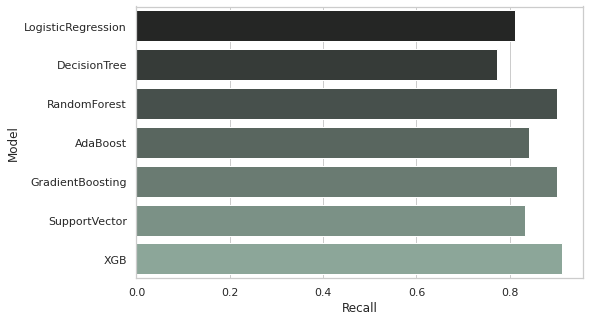

In [259]:
plt.figure(figsize=(8,5))
sns.barplot(x='Recall', y='Model', data=modelRecallScaled,palette="dark:#8A9")

>With feature selection and standardization we can see that XGB gives the highest recall

**f1 comparision of all the models used above**

In [260]:
f1_scaled = [f1LogisticScaled,f1DecisionScaled,f1RandomScaled,f1AdaBoostScaled,f1GradientScaled,f1SVCScaled,f1XGBScaled]
model_scaled = ['LogisticRegression','DecisionTree','RandomForest','AdaBoost','GradientBoosting','SupportVector','XGB']

In [261]:
modelF1Scaled = pd.DataFrame(data={'Model':model_scaled,'F1':f1_scaled})

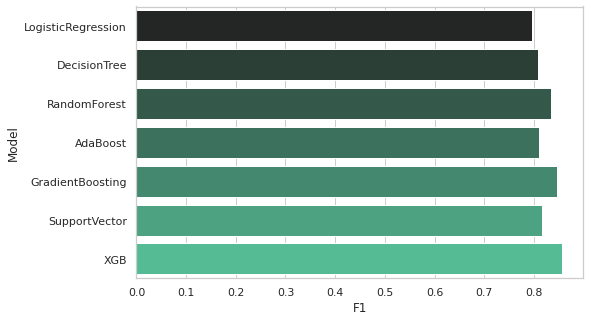

In [262]:
plt.figure(figsize=(8,5))
sns.barplot(x='F1', y='Model', data=modelF1Scaled,palette="dark:#4C9")

>With feature selection and standardization we can see that XGB gives the highest f1 score